<a href="https://colab.research.google.com/github/AndreAmaral0802/real_state_funds_VS_SELIC/blob/main/stock_predic_NT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memorym (LSTM)
# We will use this code to predict the closing stock price of a corporation (Tesla Inc.) using the past 60 days stock price.

In [ ]:
#Import the Libraries 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote
df = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2021-02-10')
#Show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2021-02-04,856.500000,833.419983,855.000000,849.989990,15812700.0,849.989990
2021-02-05,864.770020,838.969971,845.000000,852.229980,18524800.0,852.229980
2021-02-08,877.770020,854.750000,869.669983,863.419983,20161700.0,863.419983


In [ ]:
#Get the numer of rowa and columns
df.shape

(2292, 6)

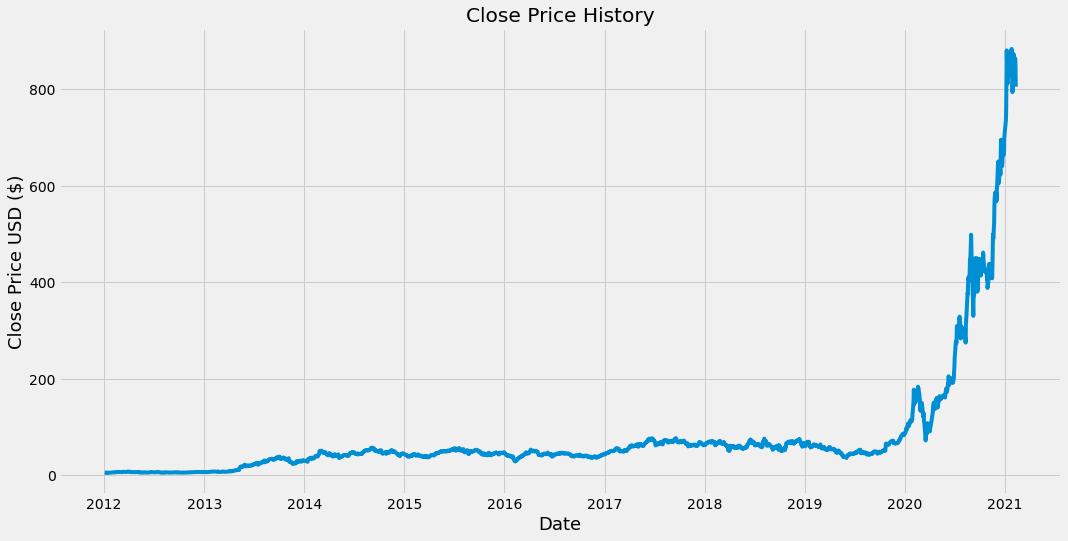

In [ ]:
#Visualise the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1834

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00120428],
       [0.00112005],
       [0.00098573],
       ...,
       [0.97761033],
       [0.96172023],
       [0.91090818]])

In [ ]:
#Creat the training dataset
#Creat the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00120428, 0.00112005, 0.00098573, 0.00093793, 0.00101533,
       0.00109956, 0.00123843, 0.00124298, 0.        , 0.00086736,
       0.00091516, 0.00090378, 0.00086736, 0.00090606, 0.00105403,
       0.00117924, 0.00140006, 0.00148885, 0.00154348, 0.00142966,
       0.00154576, 0.00169829, 0.00190317, 0.00205115, 0.00200562,
       0.00208074, 0.00222872, 0.00189179, 0.00198058, 0.00236303,
       0.00246092, 0.00259296, 0.00277281, 0.00266581, 0.00260207,
       0.00267264, 0.00249507, 0.00246548, 0.00250873, 0.00241767,
       0.00264532, 0.00256109, 0.00249962, 0.00234937, 0.00235165,
       0.00234027, 0.00272045, 0.00300957, 0.00302778, 0.00284566,
       0.00277964, 0.00285249, 0.00277508, 0.00277053, 0.00281378,
       0.00264305, 0.0025702 , 0.003326  , 0.00344893, 0.00342845])]
[0.0033100671390087323]

[array([0.00120428, 0.00112005, 0.00098573, 0.00093793, 0.00101533,
       0.00109956, 0.00123843, 0.00124298, 0.        , 0.00086736,
       0.00091516, 0.00090378, 0.

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1774, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1774/1774 [==============================] - 37s 19ms/step - loss: 8.3490e-05


In [ ]:
#Create the testing dataset
#CReate a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [ ]:
#Convert data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

34.31718892926212

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


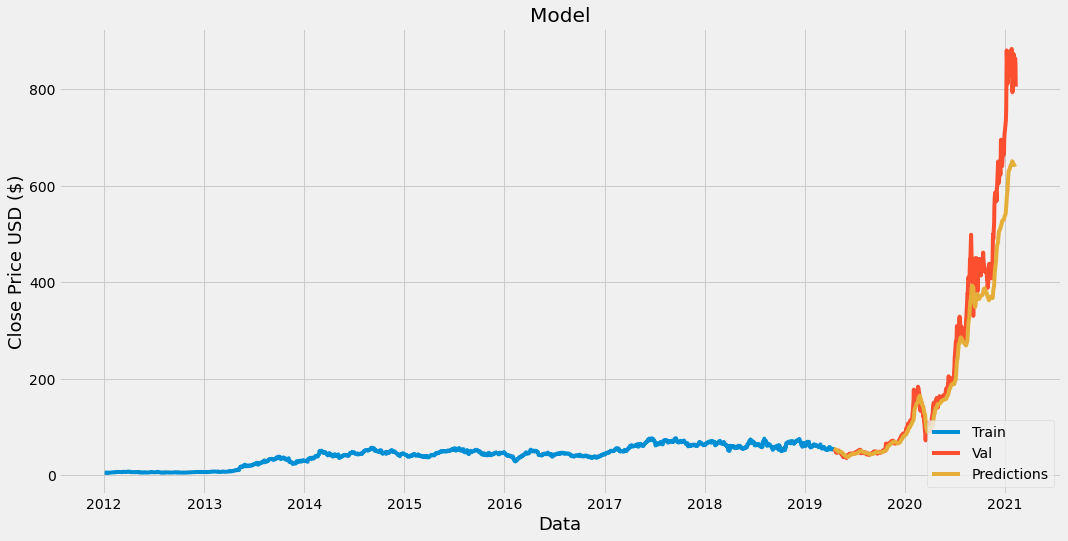

In [ ]:
#Plot the data
train =data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-04-18,54.652000,54.132442
2019-04-22,52.549999,54.098167
2019-04-23,52.779999,53.924240
2019-04-24,51.731998,53.706730
2019-04-25,49.526001,53.389217
...,...,...
2021-02-04,849.989990,642.984192
2021-02-05,852.229980,643.249084
2021-02-08,863.419983,643.591919


In [ ]:
#Get the quote   (This is to predict the stock value of next day or 18/12/2019)
apple_quote = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2021-02-11')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the scaling price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[638.5933]]


In [ ]:
#Get the quote for the real value of 18/12/2019
tesla_quote2 = web.DataReader('TSLA', data_source='yahoo', start='2021-02-10', end='2021-02-11')
print(tesla_quote2['Close'])

Date
2021-02-10    804.820007
2021-02-11    811.659973
Name: Close, dtype: float64


In [ ]:
#the real value was $811.66 and the predicted value was 638.59